In [1]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/github/df_procesado/trollers_fe.csv",
    }
print(config)

{'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/github/df_procesado/trollers_fe.csv'}


In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 1.0.2.


Cargamos el dataset.

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')

In [4]:
df.groupby('is_fishing').head(3)

mmsi     timestamp  distance_from_shore  distance_from_port  \
0     1.670724e+14  1.339663e+09         17691.373047        26925.162109   
1     1.670724e+14  1.339663e+09         14764.460938        25317.357422   
2     1.670724e+14  1.339727e+09         18027.312500        28634.939453   
1834  2.740638e+14  1.425716e+09          8485.073242         9999.754883   
1835  2.740638e+14  1.425716e+09          9219.318359        10629.884766   
1836  2.740638e+14  1.425717e+09          9899.251953        11401.474609   

      speed    course       lat       lon is_fishing source  ...  \
0       6.3  0.830278  0.967198  0.251943         NO    gfw  ...   
1       6.4  0.855000  0.967377  0.251483         NO    gfw  ...   
2       8.4  0.350833  0.967056  0.251651         NO    gfw  ...   
1834    2.1  0.233889  0.721769  0.635278         SI    gfw  ...   
1835    2.5  0.277500  0.721778  0.635468         SI    gfw  ...   
1836    2.2  0.197222  0.721801  0.635618         SI    gfw  ...   

          J0_lag_3      J0_lag_4      J0_lag_5      J0_lag_6  C0_lag_1  \
0     1.341827e-09 -3.755191e-09  7.348684e-10  2.725702e-14  0.000049   
1    -2.916805e-12  1.341827e-09 -3.755191e-09  7.348684e-10 -0.000005   
2     5.412987e-12 -2.916805e-12  1.341827e-09 -3.755191e-09  0.000037   
1834 -7.058984e-09  6.736133e-09 -2.004874e-11  3.968931e-09 -0.000636   
1835  2.067418e-12 -7.058984e-09  6.736133e-09 -2.004874e-11  0.000009   
1836  1.750767e-09  2.067418e-12 -7.058984e-09  6.736133e-09  0.000055   

          C0_lag_2      C0_lag_3      C0_lag_4      C0_lag_5      C0_lag_6  
0    -2.493796e-06 -7.935093e-05  3.860701e-04 -4.846542e-05 -8.437874e-06  
1     4.885567e-05 -2.493796e-06 -7.935093e-05  3.860701e-04 -4.846542e-05  
2    -4.932398e-06  4.885567e-05 -2.493796e-06 -7.935093e-05  3.860701e-04  
1834  7.490297e-07  4.485484e-06 -3.025624e-05  4.417586e-07  5.963165e-05  
1835 -6.362565e-04  7.490297e-07  4.485484e-06 -3.025624e-05  4.417586e-07  
1836  9.416190e-06 -6.362565e-04  7.490297e-07  4.485484e-06 -3.025624e-05  

[6 rows x 58 columns]

In [5]:
df = df.drop(['mmsi', 'source','timestamp','source','datetime','distance_from_shore','distance_from_port'], axis = 1)
lagged_columns = ['A0', 'J0', 'C0','speed_lag_1', 'speed_lag_2',
       'speed_lag_3', 'speed_lag_4', 'speed_lag_5', 'speed_lag_6',
       'course_lag_1', 'course_lag_2', 'course_lag_3', 'course_lag_4',
       'course_lag_5', 'course_lag_6', 'S0_lag_1', 'S0_lag_2', 'S0_lag_3',
       'S0_lag_4', 'S0_lag_5', 'S0_lag_6', 'A0_lag_1', 'A0_lag_2', 'A0_lag_3',
       'A0_lag_4', 'A0_lag_5', 'A0_lag_6', 'J0_lag_1', 'J0_lag_2', 'J0_lag_3',
       'J0_lag_4', 'J0_lag_5', 'J0_lag_6', 'C0_lag_1', 'C0_lag_2', 'C0_lag_3',
       'C0_lag_4', 'C0_lag_5', 'C0_lag_6']
for column in lagged_columns:
    df[column]=df[column].abs()

print(df)


       speed    course       lat       lon is_fishing  sun_state   distance  \
0        6.3  0.830278  0.967198  0.251943         NO          1  12.460250   
1        6.4  0.855000  0.967377  0.251483         NO          1   3.130300   
2        8.4  0.350833  0.967056  0.251651         NO          1   2.251642   
3        8.3  0.372778  0.966446  0.252871         NO          1   8.629961   
4        7.7  0.268889  0.966132  0.253582         NO          1   4.921015   
...      ...       ...       ...       ...        ...        ...        ...   
13991    2.0  0.246667  0.996371  0.212425         NO          1   0.184542   
13992    2.7  0.116667  0.996361  0.212444         NO          1   0.134451   
13993    0.3  0.719722  0.996352  0.212436         NO          1   0.076645   
13994    4.4  0.808056  0.996348  0.212445         NO          1   0.063297   
13995    0.3  0.353889  0.996313  0.212339         NO          1   0.712027   

       timediff        S0            A0  ...      J

Generamos los vectores de train y test.

In [6]:
#Generamos train y test.

#Si la longitud del dataset es mayor a 10000, partiremos agrupado por "is_fishing" ya que nos puede tocar un conjunto con is_fishing='SI' vacio.
#if len(dataset)>10000:
    #df = df.sample(n=10000, random_state=1)
#    df = df.groupby("is_fishing").sample(n=7500, random_state=1,replace=True)
#    df = df.drop_duplicates()

X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))



1286
12710


Funcion para evaluar los modelos.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['NO', 'SI'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)
    return _precision_score, _recall_score, _accuracy_score, _f1_score


Generamos RF como para tener un parametro para comparar.

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Train Accuracy : 1.000
Test Accuracy : 0.954
Best Score Through Grid Search : 0.952
Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Random forest optimizado

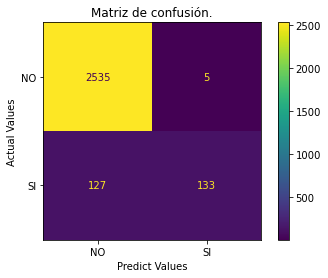

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.96     </td><td>0.51  </td><td>0.95    </td><td>0.67</td></tr>\n</tbody>\n</table>'

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,20,25,30,40,50,100],
    'max_features': ["auto"],
    'min_samples_leaf': [1,2,4,8,16,32],
    'min_samples_split': [2, 4,8,16,32],
    'n_estimators': [50,100 , 200,400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)
grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = RandomForestClassifier(bootstrap=grid.best_params_['bootstrap'], 
                            max_depth=grid.best_params_['max_depth'],
                            max_features=grid.best_params_['max_features'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            n_estimators=grid.best_params_['n_estimators']
)
print(dt.get_params)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rf_precision_score, rf_recall_score, rf_accuracy_score, rf_f1_score = evaluate_model('Random forest optimizado', y_test, y_pred)


In [12]:
print(grid.best_params_)


{'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

import lightgbm as lgb
fit_params={#"early_stopping_rounds":150, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'categorical_feature': 'auto'}


from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(50, 800), 
             'min_child_samples': sp_randint(100, 600), 
             'min_child_weight': [1e-7,1e-6,1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0,1e-2 , 1e-3, 1e-4,1e-5, 1e-1, 1, 2, 5, 7, 10,100],
             'reg_lambda': [0,1e-2,1e-3, 1e-4 ,1e-5, 1e-1, 1, 5, 10, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 200*2*2*4

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, metric='auc', n_jobs=-1, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, 
    param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=False)

gs.fit(X_train, y_train, **fit_params, verbose=-1)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))


d:\Users\nico_\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
d:\Users\nico_\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
d:\Users\nico_\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release o

Best score reached: 0.9775506448849097 with params: {'colsample_bytree': 0.960778977258131, 'min_child_samples': 110, 'min_child_weight': 1e-05, 'num_leaves': 494, 'reg_alpha': 0.001, 'reg_lambda': 0.001, 'subsample': 0.5565695636216966} 


lgbm grid search

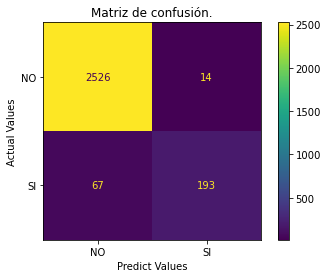

'<table>\n<tbody>\n<tr><td>Precision</td><td>Recall</td><td>Accuracy</td><td>F1  </td></tr>\n<tr><td>0.93     </td><td>0.74  </td><td>0.97    </td><td>0.83</td></tr>\n</tbody>\n</table>'

In [27]:

opt_parameters = gs.best_params_
#Configure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

y_pred = clf_final.predict(X_test)
lgbm_precision_score_auc, lgbm_recall_score_auc, lgbm_accuracy_score_auc, lgbm_f1_score_auc = evaluate_model('lgbm grid search', y_test, y_pred)



In [ ]:
print('Plotting feature importances...')
ax = lgb.plot_importance(clf_final, max_num_features=20,importance_type ='gain',figsize=(20, 10) )
plt.figure(figsize=(100, 10))
plt.show()

Arboles de decision optimizado

In [28]:
from IPython.display import Markdown as md
md(f'''| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
|Random Forest       |{rf_precision_score:.3f} |	{rf_recall_score:.3f}|	{rf_accuracy_score:.3f}|	{rf_f1_score:.3f}|
| LightGBM      |{lgbm_precision_score_auc:.3f}|	{lgbm_recall_score_auc:.3f}|	{lgbm_accuracy_score_auc:.3f}|	{lgbm_f1_score_auc:.3f}|
'''
       )


| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| LightGBM_auc      |0.932|	0.742|	0.971|	0.827|
